In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, pairwise_distances

## Load Data

In [2]:
df = pd.read_csv('../../data/sample/data.csv')

In [3]:
df.shape

(174389, 19)

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Clean Data

In [5]:
df['artists'] = df['artists'].str.slice(2)

In [6]:
df['artists'] = df['artists'].str[:-2]

In [7]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
features

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [8]:
df_input = df[features]

In [9]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_input), columns = df_input.columns)

In [125]:
tmp = df.copy()

In [126]:
tmp[features] = pd.DataFrame(scaler.fit_transform(tmp[features]))
tmp

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,1.294358,Mamie Smith,0.347919,168333,-0.948791,0,0cS0A1fUEUd1EW3FcF8AEI,-0.588004,5,0.930106,-0.154111,0,Keep A Song In Your Soul,12,1920,-0.066549,1.089753,0.413903,1920
1,0.378411,Screamin' Jay Hawkins,1.790898,150200,0.125710,0,0hbkKFIJm7Z05H8Zl9w30f,-0.510657,5,-0.721489,0.788862,0,I Put A Spell On You,7,1920-01-05,-0.287113,-0.995485,1.608718,1920
2,1.299622,Mamie Smith,0.626289,163827,-1.088146,0,11m7laMUgmOKqI3oYzuhne,-0.589511,0,1.705763,-0.060991,1,Golfing Papa,4,1920,0.374580,-0.641450,0.621861,1920
3,-1.313529,Oscar Velazquez,1.097814,422087,1.156204,0,19Lc5SfJJ5O1oaxY0fpwfh,1.804534,2,-0.460536,0.780077,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,-0.346918,0.363273,-1.823729,1920
4,-0.537536,Mixe,0.950107,165224,0.822485,1,2hJjbsLCytGsnAHfdsLejp,-0.588829,10,1.057535,1.004092,0,Xuniverxe,2,1920-10-01,-0.158725,0.167564,-0.852753,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,-1.289849,"DJ Combo', 'Sander-7', 'Tony T",1.450037,147615,1.405576,0,46LhBf6TvYjZU2SMvGZAbn,-0.589385,6,-0.183516,1.170478,0,The One,0,2020-12-25,-0.384776,0.296340,-1.280013,2020
174385,0.778480,Alessia Cara,-0.612173,144720,-0.996465,0,7tue2Wemjd0FZzRtDrQFZd,-0.589564,4,-0.083788,0.015086,1,A Little More,0,2021-01-22,-0.382582,-0.736975,-1.121208,2021
174386,0.807432,Roger Fly,0.762634,218147,0.389751,0,48Qj61hOdYmUCFJbpQ29Ob,2.160212,4,-0.543642,-0.112822,0,Together,0,2020-12-09,-0.425378,-0.295778,0.716387,2020
174387,1.107484,Taylor Swift,-0.424699,244000,-0.890115,1,1gcyHQpBQ1lfXGdhZmWrHP,-0.589564,0,-0.543642,-0.057301,1,champagne problems,69,2021-01-07,-0.373254,1.795212,-0.773351,2021


In [127]:
df_scale

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903
1,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718
2,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861
3,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729
4,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753
...,...,...,...,...,...,...,...,...,...
174384,-1.289849,1.450037,1.405576,-0.589385,-0.183516,1.170478,-0.384776,0.296340,-1.280013
174385,0.778480,-0.612173,-0.996465,-0.589564,-0.083788,0.015086,-0.382582,-0.736975,-1.121208
174386,0.807432,0.762634,0.389751,2.160212,-0.543642,-0.112822,-0.425378,-0.295778,0.716387
174387,1.107484,-0.424699,-0.890115,-0.589564,-0.543642,-0.057301,-0.373254,1.795212,-0.773351


## Modeling (by using K-Means Clustering)

In [57]:
def KMeansClustering(df, cluster_choice, seed=10):
    model_list = []
    for k in cluster_choice:
        model = KMeans(n_clusters=k, random_state=seed).fit(df)
        model_list.append(model)
    return model_list

In [58]:
def cluster_plot(df, model_list, cluster_choice):
    intertia = [i.inertia_ for i in model_list]
    silhouette_list = [silhouette_score(df, i.labels_) for i in model_list]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axs[0].plot(cluster_choice, intertia, color='royalblue')
    axs[1].plot(cluster_choice, silhouette_list, color='lightcoral')
    
    for i in range(2): 
        axs[i].set_xlabel('number of clusters')
    for idx, name in zip([0,1,2], ['inertia', 'silhouette score']): 
        axs[idx].set_ylabel(name)
    
    plt.show()

Use a subset of the dataset to find the desired value for the number of clusters, because it takes too much time to compute the silhouette score for the whole dataset.

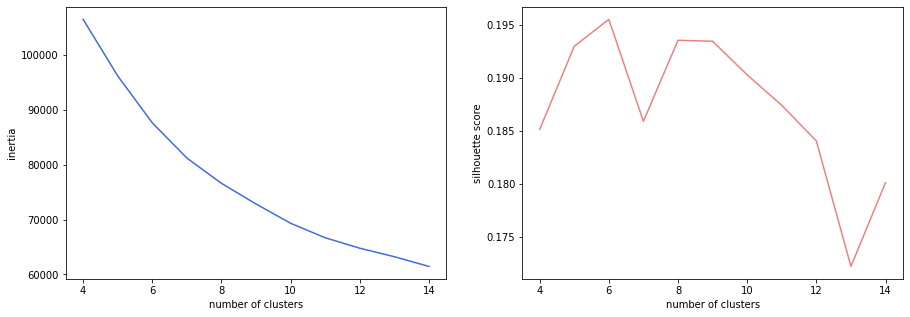

In [59]:
df_subset = df_scale.sample(20000, random_state = 114514)
cluster_choice = range(4, 15)
model_list = KMeansClustering(df_subset, cluster_range)
cluster_plot(df_subset, model_list, cluster_choice)

It seems that k = 8 is the bset in this case. Retrain the model on the whole dataset with k = 8

In [10]:
final_model = KMeans(n_clusters = 8, random_state = 10).fit(df_scale)

## Recommendation

In [11]:
df_cluster = df_scale.copy().assign(cluster=final_model.predict(df_scale), name=df['name'], artist=df['artists'])
df_cluster.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster,name,artist
0,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903,7,Keep A Song In Your Soul,Mamie Smith
1,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718,4,I Put A Spell On You,Screamin' Jay Hawkins
2,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861,7,Golfing Papa,Mamie Smith
3,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729,3,True House Music - Xavier Santos & Carlos Gomi...,Oscar Velazquez
4,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753,3,Xuniverxe,Mixe


In [12]:
df_cluster['cluster'].value_counts()

4    39197
7    30461
3    30457
1    27655
6    14701
0    13569
2    11198
5     7151
Name: cluster, dtype: int64

In [130]:
len(df_cluster['cluster'].unique())

8

For each cluster, find the 10 closet points for each song

In [13]:
num_clusters = 8
rec_result = []
for i in range(num_clusters):
    # print(i)
    # filter to the corresponding cluster
    df_filter = df_cluster[df_cluster['cluster'] == i].reset_index(drop=True)
    
    # find the 10 points which is closet to a song
    dist_mat = pairwise_distances(df_filter[features])
    dist_mat[dist_mat == 0] = np.nan
    neighbors = np.argsort(dist_mat)[:,:10]
    
    name = df_filter['name'].to_dict()
    map_cloest_info = np.vectorize(name.get)(neighbors)
    cluster_rec = pd.DataFrame(map_cloest_info, columns=[f'rec{i}' for i in range(1, 11)])
    cluster_song = df_filter[['name', 'artist']].copy()
    cluster_final = pd.concat([cluster_song, cluster_rec], axis = 1)
    
    rec_result.append(cluster_final)
    

0
1
2
3
4
5
6
7


In [20]:
df_rec = pd.concat(rec_result, axis=0).reset_index(drop=True)
df_rec

,name,artist,rec1,rec2,rec3,rec4,rec5,rec6,rec7,rec8,rec9,rec10
0,Crazy Blues - 78rpm Version,Mamie Smith & Her Jazz Hounds,Το τραγούδι του μανάβη,Anoche Soñé - Remasterizado,Ntoina,Think Deep,Geia sou Lola,Mein Vaterland 1. Teil,Neva Rast Manes,Neva rast manes,"Violin Concerto, Op. 77, in D: Allegro giocoso...","Water Music Suite, HWV 348-350: Alla Hornpipe"
1,La Chacarera - Remasterizado,Francisco Canaro,O ipodikos,La Payasa - Remasterizado,Madonna Ornella,Main Harijan Ki Chhori - Duet,"Piano Sonata No. 11 in A Major, K. 331: III. R...","Suite in F-Sharp Minor, Op. 6: II. Danse fanta...",Hallucinations,Katestrepses ta niata mou,And She Remembers Me,Moodathanavidheke
2,Desengaño - Remasterizado,Francisco Canaro,Jaguar,Caravan,The Boll Weevil,"Theme From ""Valley Of The Dolls""",No me Digas Que la Quiero - Remasterizado,Mpinta giala,Nubes de Humo - Remasterizado,Love For Sale,Ol Man River,den thelo to kako sou
3,Ta oula sou,Ka Koula,How Many Times Do I Have to Tell You?,Ta dika sou matia,Neva rast manes,Neva Rast Manes,Logia glika,Logia Gluka,Petrushka Suite: The Shrovetide Fair (Towards ...,Σαμιώτικο - νυφιάτικος,"Keyboard Concerto in D Minor, BWV 1052: III. A...",Kathe Agapi
4,El Africano - Remasterizado,Francisco Canaro,After The Storm - 2016 Edition,Καήκε ένα σχολείο,Preet Ke Bandhan Mein - Instrumental,Poyli moy giati argises,How Long Blues,Retintin - Instrumental (Remasterizado),Holi Main Kheloongi,I Didn't Know What Time It Was - live at St Ni...,"Symphony No. 25 in G Minor, K. 183: IV. Allegro",Joy Without Pleasure
...,...,...,...,...,...,...,...,...,...,...,...,...
174384,Heaven,Julia Michaels,Heaven,Drunk Girl,El Privilegio De Amar,FourFiveSeconds,"30,000 Feet",Can We Still Be Friends?,Can We Still Be Friends?,One Year Since Shikakun Holds Hands And Erects,One Year Since Shikakun Holds Hands And Erects,Little Rain
174385,Issues - Acoustic,Julia Michaels,Issues - Acoustic,Fire Truck!,Did You Ever Love A Woman,De Mi Barrio,A Girl I Used To Know,Ojos de Almendra (Instrumental y Voz),ทุ้มอยู่ในใจ - เพลงประกอบภาพยนตร์ SuckSeed ห่ว...,Ridin' High,Yo Ya No Vuelvo Contigo - En Vivo,Siluetas
174386,Precious' Tale,Jazmine Sullivan,Dekho Ji Mori Bahiyan Pakad Ke,Tomtar på loftet,Red Bird,West Indian Weed Woman,Everybody's Free (To Wear Sunscreen),Piya Ki Bansuriya Huyi Kaleje Paar,Le Genre De La Maison,"Kiss Me, Kate: I've Come to Wive It Wealthily ...",I Can't Believe That You're In Love With Me,P-Funk (Wants To Get Funked Up)
174387,Connexion,ZAYN,Connexion,Bluebeard Blues,"No Woman, No Cry - Outtake",Vanish in Our Sleep,I'll Always Come Back,For the Good Times,Desde Que Te Ví,Se...,No Ordinary Love,We See


In [147]:
df_rec.columns = ['Song Title', 'Artist', 'Recommendation1', 'Recommendation2', 'Recommendation3', 
                  'Recommendation4', 'Recommendation5', 'Recommendation6', 'Recommendation7',
                 'Recommendation8', 'Recommendation9', 'Recommendation10']
#df_rec.to_csv("./recommendations.csv",index=False)
df_rec.to_csv("../../data/result/recommendations.csv", index=False)

In [152]:
df_rec[(df_rec['Song Title'] == 'Someone Like You') & (df_rec['Artist'] == 'Adele')]

,Song Title,Artist,Recommendation1,Recommendation2,Recommendation3,Recommendation4,Recommendation5,Recommendation6,Recommendation7,Recommendation8,Recommendation9,Recommendation10
148109,Someone Like You,Adele,The Christmas Waltz,Un homme et une femme,Bhagwan Bata Hamne Tera Kya,童話,Epistrophy,The Gift (feat. Collin Raye & Susan Ashton),Lost,Desperados Waiting For A Train,In My Youth,Stay


In [151]:
df_rec.iloc[128029]

Song Title          Kapitel 13 - Karl III. Und Anna von Österreich
Artist                                            Manfried Rössner
Recommendation1                      Часть 8.3 - Триумфальная арка
Recommendation2     Kapitel 12 - Karl III. Und Anna von Österreich
Recommendation3      Часть 196.5 & Часть 197.1 - Триумфальная арка
Recommendation4                                Steve Berman - Skit
Recommendation5      Kapitel 9 - Karl III. Und Anna von Österreich
Recommendation6     Kapitel 31 - Karl III. Und Anna von Österreich
Recommendation7                    Часть 202.2 - Триумфальная арка
Recommendation8                                   What Time Is It?
Recommendation9                    Часть 184.3 - Триумфальная арка
Recommendation10     Часть 183.5 & Часть 184.1 - Триумфальная арка
Name: 128029, dtype: object

In [153]:
df_rec[df_rec['Artist'] == 'Jay Chou']

,Song Title,Artist,Recommendation1,Recommendation2,Recommendation3,Recommendation4,Recommendation5,Recommendation6,Recommendation7,Recommendation8,Recommendation9,Recommendation10
30839,安靜,Jay Chou,This Love,All I Have,I Finally Found Someone (feat. Bryan Adams),Kung Wala Ka,Great Are You Lord,A Thousand Years (Tribute Twilight),A Thousand Years (Tribute Twilight),No Hard Feelings,Come As You Are,Tell Your Heart To Beat Again
36098,擱淺,Jay Chou,Make It Like It Was,Gracias,Shattered,For the First Time,Footprints in the Sand,Quizás,Blanca Navidad,Tell Me,Blinded by Science,Another Love
40983,分裂,Jay Chou,Hold On,Where Were You (When the World Stopped Turning),Where Were You (When the World Stopped Turning),Miedo,Fancy - Mono Mix,Aunque no te pueda ver,My Heart Is Buried In Venice,Soulfight,How Do I Live - Songbook Version,Follow The Sun
63754,晴天,Jay Chou,晴天,Oh Girl,Messin' with the Mekon - 2006 Remaster,Diamond Girl,What If She's An Angel,สัญญาณไม่ดี(หรือหัวใจมีปัญหา),I Can't Stop The Rain,Nunca Niegues Que Te Amo,Lessons in Love - 2005 Remaster,Epiphany
72976,七里香,Jay Chou,七里香,A Girl Like You,You Make Me Feel So Young,Hasn't Hit Me Yet - Remastered 2012 version,Radioactive,American Pie,Crazy World,Songbird,All Or Nothing At All,No One Makes It on Her Own
73078,一路向北,Jay Chou,一路向北,Fragile - Studio Version 2009,In a Year from Now,Tears of the Dragon - 2001 Remastered Version,My Oh My,That Should Be Me,Goodbye Yellow Brick Road,Goodbye Yellow Brick Road,Full Circle,You Are More
81896,稻香,Jay Chou,Spoil My Night (feat. Swae Lee),Bora Bora,My Girl,So High (feat. Ghost Loft),Rich & Sad,Smile (with The Weeknd),Smile (with The Weeknd),The District Sleeps Alone Tonight - Remastered,Smile (with The Weeknd),Soap
106133,半島鐵盒,Jay Chou,等你等到我心痛,My Little Secret,like i need u,Stranger in Moscow,She's Falling Apart,Trndsttr - Lucian Remix,Get Gone,I'm Still In Love With You,Life Goes On,Living in Confusion
113384,簡單愛,Jay Chou,"Touchin, Lovin (feat. Nicki Minaj)",Coffee (feat. Marc E. Bassy),Galvanize,Kicked Out Again,2AM.,PRIMADONA,It Wasn't Me,It Wasn't Me,Badfish,Classic Man (feat. Roman GianArthur)
113401,暗號,Jay Chou,Mi Razón De Ser,Light Morning,My Favourite Things - Album Mix,Drive (For Daddy Gene),A Lo Mejor,Walking in Memphis,ห่างกันสักพัก ( Break ),Ruin My Life,Ruin My Life,Happy Now


Convert the dataframe from wide to long to include more information for each recommended song

In [30]:
df_long = df_rec.melt(id_vars=['name', 'artist'], var_name="Rank", value_name="Recommended Song")
df_long['Rank'] = df_long.Rank.str.replace('rec', '').astype(int)
df_long = df_long.sort_values(['name', 'artist', 'Rank'], ignore_index = True)
df_long.rename(columns={'name':'Song Title'}, inplace=True)

In [31]:
df_long

,Song Title,artist,Rank,Recommended Song
0,"""40""",U2,1,"""40"" - Remastered 2008"
1,"""40""",U2,2,"""40"" - Remastered 2008"
2,"""40""",U2,3,I Remember Nothing - 2007 Remaster
3,"""40""",U2,4,"Ready, Able"
4,"""40""",U2,5,Sweet Thang
...,...,...,...,...
1743885,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,6,Soldier of Fortune
1743886,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,7,忘不了
1743887,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,8,Como Tú
1743888,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,9,I'll Take Care Of You


In [116]:
info = ['name', 'artists', 'duration_ms']
df_final_rec = df_long.merge(df[info], how='inner', left_on='Recommended Song', right_on='name')
df_final_rec = df_final_rec.drop('name', axis=1).groupby(['Song Title', 'artist', 'Rank']).first().reset_index()

df_final_rec
#df_final_rec = df_final_rec.drop('name', axis=1).groupby(['Song Title', 'artist'])['Rank', 'Recommend Song', 'artists', 'duration_ms'].first().reset_index()

,Song Title,artist,Rank,Recommended Song,artists,duration_ms
0,"""40""",U2,1,"""40"" - Remastered 2008",U2,157667
1,"""40""",U2,2,"""40"" - Remastered 2008",U2,157667
2,"""40""",U2,3,I Remember Nothing - 2007 Remaster,Joy Division,355186
3,"""40""",U2,4,"Ready, Able",Grizzly Bear,257213
4,"""40""",U2,5,Sweet Thang,Shuggie Otis,252173
...,...,...,...,...,...,...
1594405,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,6,Soldier of Fortune,Deep Purple,193653
1594406,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,7,忘不了,童安格,254360
1594407,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,8,Como Tú,Los Temerarios,237400
1594408,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,9,I'll Take Care Of You,"Bobby ""Blue"" Bland",136867


In [117]:
df_final_rec.columns = ['Song Title', 'Artist', 'Rank', 'Recommended Song', 'Recommended Song Artist', 'Duration_ms']

In [118]:
df_final_rec

,Song Title,Artist,Rank,Recommended Song,Recommended Song Artist,Duration_ms
0,"""40""",U2,1,"""40"" - Remastered 2008",U2,157667
1,"""40""",U2,2,"""40"" - Remastered 2008",U2,157667
2,"""40""",U2,3,I Remember Nothing - 2007 Remaster,Joy Division,355186
3,"""40""",U2,4,"Ready, Able",Grizzly Bear,257213
4,"""40""",U2,5,Sweet Thang,Shuggie Otis,252173
...,...,...,...,...,...,...
1594405,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,6,Soldier of Fortune,Deep Purple,193653
1594406,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,7,忘不了,童安格,254360
1594407,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,8,Como Tú,Los Temerarios,237400
1594408,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,9,I'll Take Care Of You,"Bobby ""Blue"" Bland",136867


In [122]:
df_final_rec[(df_final_rec['Song Title'] == 'Someone Like You') & (df_final_rec['Artist'] == 'Adele')]

,Song Title,Artist,Rank,Recommended Song,Recommended Song Artist,Duration_ms
1182570,Someone Like You,Adele,1,The Christmas Waltz,Doris Day,164933
1182571,Someone Like You,Adele,2,Un homme et une femme,Georges Jouvin,164200
1182572,Someone Like You,Adele,3,Bhagwan Bata Hamne Tera Kya,Uma Devi,197703
1182573,Someone Like You,Adele,4,童話,Michael Wong,246009
1182574,Someone Like You,Adele,5,Epistrophy,Thelonious Monk Septet,644333
1182575,Someone Like You,Adele,6,The Gift (feat. Collin Raye & Susan Ashton),"Jim Brickman', 'Collin Raye', 'Susan Ashton",221573
1182576,Someone Like You,Adele,7,Lost,"T-Dre', 'Delux', 'Cali Life Style",288157
1182577,Someone Like You,Adele,8,Desperados Waiting For A Train,Guy Clark,269733
1182578,Someone Like You,Adele,9,In My Youth,Matt McAndrew,199228
1182579,Someone Like You,Adele,10,Stay,Oingo Boingo,217427


In [143]:
df_final_rec.to_csv("../../data/result/recommendations.csv", index=False)